Q: Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [2]:
import pandas as pd
import numpy as np

In [14]:
cococola = pd.read_excel('/Users/nihadnazar/Desktop/ASSIGNMENTS/DATASETS/CocaCola_Sales_Rawdata.xlsx')

In [15]:
cococola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [16]:
coco = cococola.copy()

In [17]:
coco.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [18]:
coco.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [19]:
coco.dtypes

Quarter     object
Sales      float64
dtype: object

In [21]:
coco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [22]:
coco.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [24]:
temp = coco.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

/var/folders/8s/_rqw5h_j02n6kdq9xprv4k9r0000gn/T/ipykernel_5956/203426683.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp = coco.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')


In [25]:
coco['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [26]:
coco

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987
5,Q2_87,2104.411995,Apr-1987
6,Q3_87,2014.362999,Jul-1987
7,Q4_87,1991.746998,Oct-1987
8,Q1_88,1869.049999,Jan-1988
9,Q2_88,2313.631996,Apr-1988


In [27]:
coco = coco.drop(['Quarter'],axis=1)
coco.reset_index(inplace=True)

In [28]:
coco['quater'] = pd.to_datetime(coco['quater'])

In [29]:
coco = coco.set_index('quater')

In [30]:
coco

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996
1987-04-01,5,2104.411995
1987-07-01,6,2014.362999
1987-10-01,7,1991.746998
1988-01-01,8,1869.049999


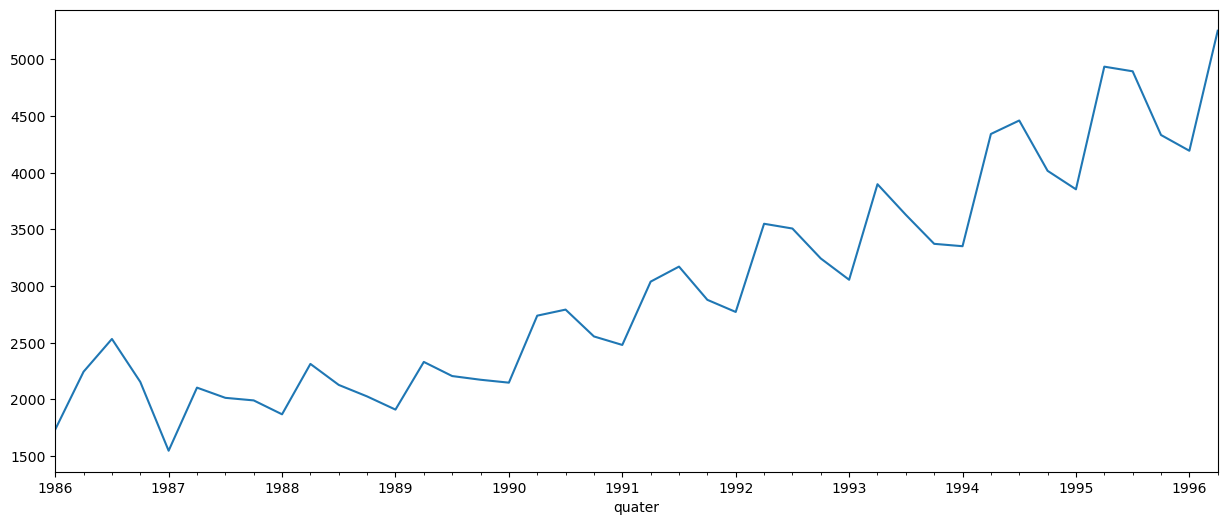

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
coco['Sales'].plot(figsize=(15,6))
plt.show()

In [32]:
len(coco['Sales'])

42

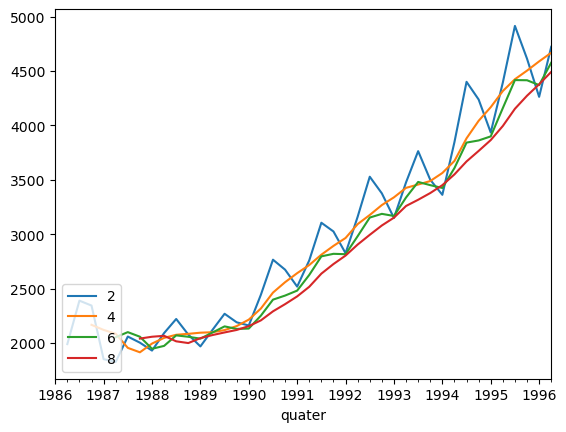

In [33]:
for i in range (2,10,2):
    coco['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)    

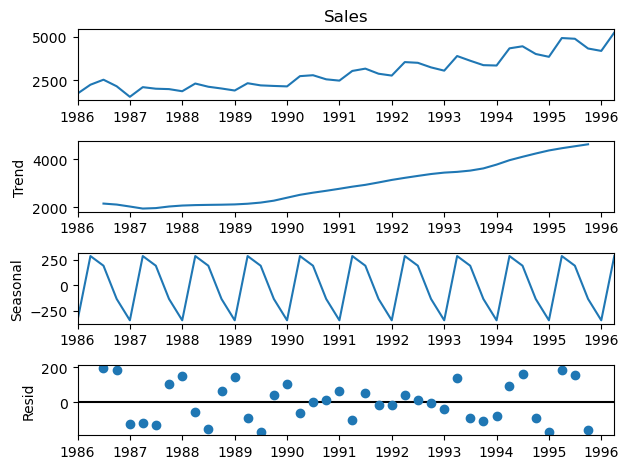

In [38]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
st_add = seasonal_decompose(coco.Sales,model='additive')
fig = st_add.plot()
plt.show()

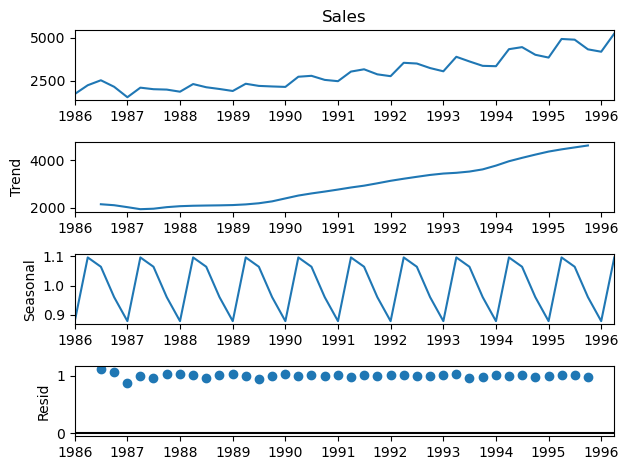

In [39]:
st_mul = seasonal_decompose(coco.Sales,model='multiplication')
fig = st_mul.plot()
plt.show()

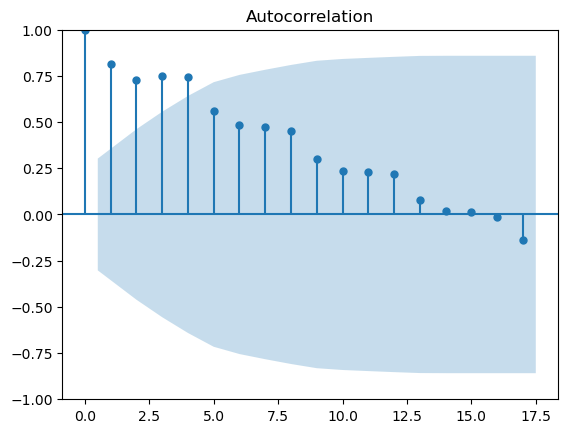

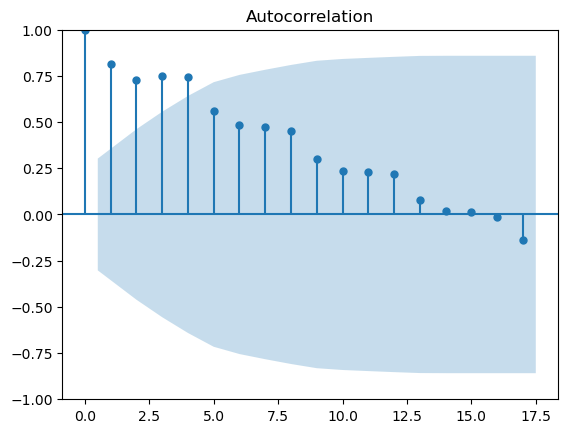

In [40]:
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
tsa_plots.plot_acf(coco.Sales)

• BUILDING THE TIME SERIES FORCAST WITH ARIMA

In [41]:
from statsmodels.tsa.arima_model import ARIMA
x = coco['Sales'].values
size = int(len(x)*0.66)
train,test = x[0:size],x[size:len(x)]
model = sm.tsa.arima.ARIMA(train,order=(5,1,0))
model_fit = model.fit()

In [42]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Fri, 13 Jan 2023   AIC                            360.163
Time:                        15:51:15   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

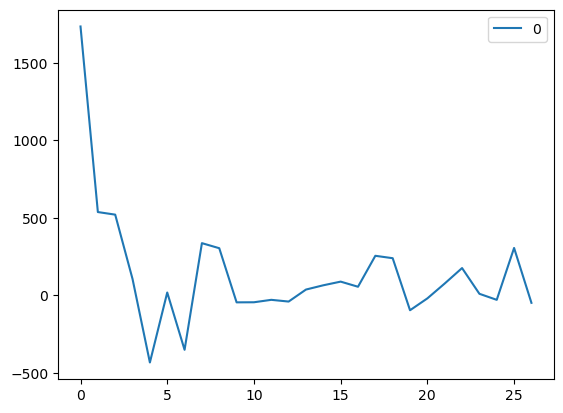

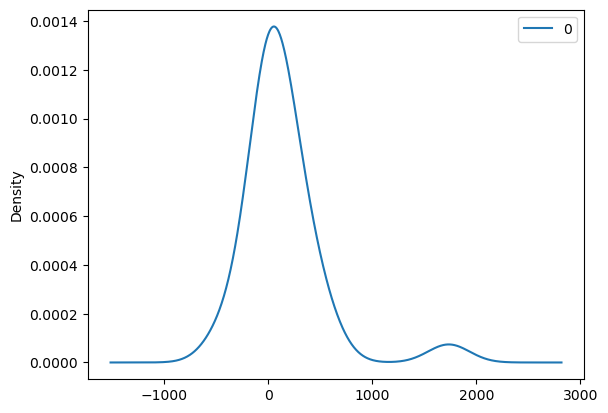

                 0
count    27.000000
mean    137.791854
std     385.970462
min    -433.659592
25%     -34.938856
50%      55.067398
75%     247.080156
max    1734.827000


In [44]:
from matplotlib import pyplot
res = pd.DataFrame(model_fit.resid)
res.plot()
pyplot.show()
res.plot(kind='kde')
pyplot.show()
print(res.describe())

In [47]:
hist = [x for x in train]
predictions = list()

In [50]:
import warnings
warnings.filterwarnings("ignore")
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(hist, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    hist.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=5157.683661, expected=3243.859993
predicted=3115.419755, expected=3056.000000
predicted=3482.932608, expected=3899.000000
predicted=4635.753097, expected=3629.000000
predicted=2189.902535, expected=3373.000000
predicted=3304.209180, expected=3352.000000
predicted=3808.075394, expected=4342.000000
predicted=3866.047362, expected=4461.000000
predicted=3911.500570, expected=4017.000000
predicted=4120.306010, expected=3854.000000
predicted=4515.599219, expected=4936.000000
predicted=4730.478275, expected=4895.000000
predicted=4324.228702, expected=4333.000000
predicted=4436.839043, expected=4194.000000
predicted=4958.966896, expected=5253.000000


In [54]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

ValueError: Found input variables with inconsistent numbers of samples: [15, 31]

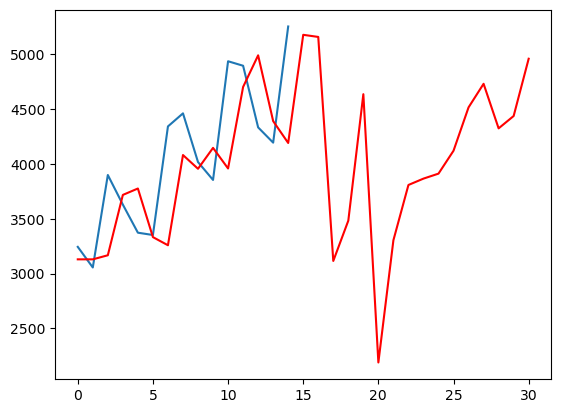

In [55]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [58]:
coco1 = pd.get_dummies(cococola, columns = ['Quarter'])

In [59]:
coco1.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [60]:
coco1

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2104.411995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2014.362999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1991.746998,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1869.049999,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2313.631996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
t = np.arange(1,43)
coco1['t'] = t

In [64]:
coco1['t_sq'] = coco1['t']*coco1['t']

In [65]:
log_sales = np.log(coco1['Sales'])

In [66]:
coco1['log_sales'] = log_sales

In [67]:
coco1

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602
5,2104.411995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,36,7.651791
6,2014.362999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,49,7.608058
7,1991.746998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,64,7.596767
8,1869.049999,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,81,7.533186
9,2313.631996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,100,7.746574


In [68]:
train1,test1 = np.split(coco1,[int(.67*len(coco1))])

In [87]:
import statsmodels.formula.api as smf
linear = smf.ols('Sales ~ t',data=train1).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin = np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918641

In [88]:
quad = smf.ols('Sales~t+t_sq',data=train1).fit()
predquad = pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037103

In [89]:
expo = smf.ols('log_sales ~ t',data=train1).fit()
predexp = pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900134

In [90]:
additive = smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd = pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186947

In [91]:
addlinear = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear = pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372472

In [92]:
addquad = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad = pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436053775

In [93]:
mulsea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul = pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954374

In [94]:
mullin = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin = pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911932085

In [95]:
mul_quad = smf.ols('log_sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad = np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467347524

In [84]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [96]:
rmse = pd.DataFrame(output)

In [97]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798
